In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add parent directory to path to import modules
sys.path.append(os.path.dirname(os.path.abspath('')))

from config import Config
from data_preprocess.data_loader import BatteryDataLoader

In [3]:
# Initialize and load data
config = Config()
config.BATCH1_PATH = "../Data/batch1.pkl"
config.BATCH2_PATH = "../Data/batch2.pkl"
config.BATCH3_PATH = "../Data/batch3.pkl"
data_loader = BatteryDataLoader(config, apply_outlier_removal=False)
train_data, val_data, test_data = data_loader.split_data()
all_data = data_loader.get_all_data()

print()
print("Data Summary:")
print(f"Train cells: {len(train_data)}")
print(f"Validation cells: {len(val_data)}")
print(f"Test cells: {len(test_data)}")
print(f"all cells: {all_data.keys()}")



Loading batch data...
Loaded batch1: 41 cells
Loaded batch2: 43 cells
Loaded batch3: 40 cells
Splitting data into train/val/test sets...
Train set: 41 cells
Validation set: 43 cells
Test set: 40 cells

Data Summary:
Train cells: 41
Validation cells: 43
Test cells: 40
all cells: dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44


Example cell data keys: dict_keys(['Vdlin', 'cycle_life', 'charge_policy', 'summary', 'cycles'])
Example cell summary: dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])
Example cycle 2 data keys: dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])
Example cell Vdlin data length: 1000


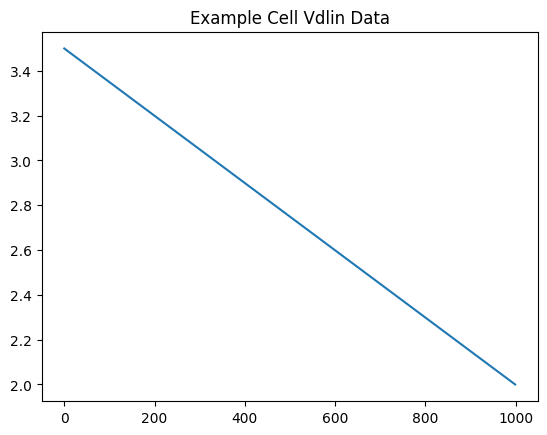

Example cycle 2 V data length: 1117


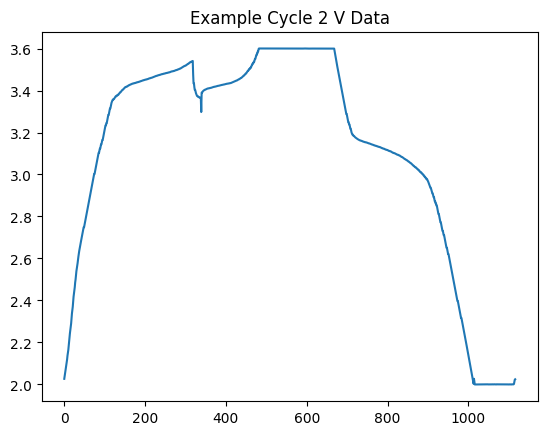

Example cycle 2 Qdlin data length: 1000


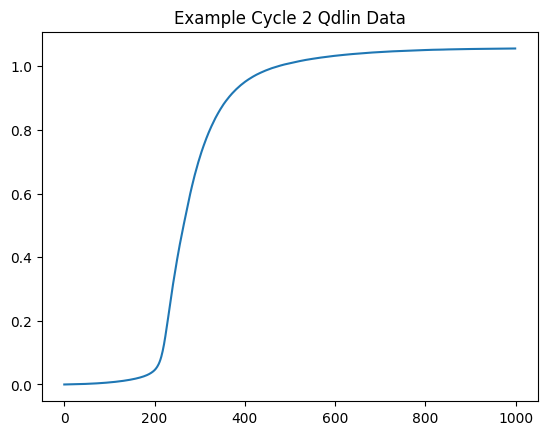

Example cycle 2 Qc data length: 1117


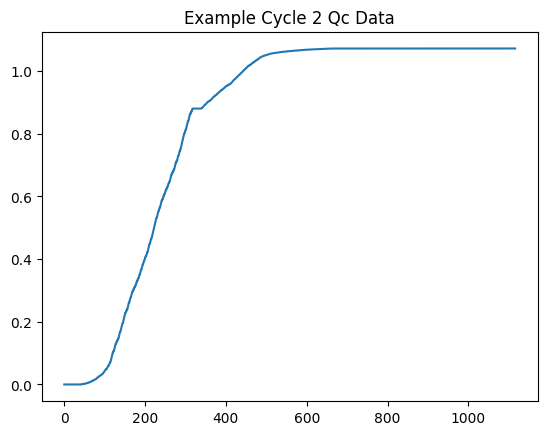

Example cell charging policy: 3.6C(80%)-3.6C


In [23]:
cell_data_example = list(all_data.values())[0]
print(f"\nExample cell data keys: {cell_data_example.keys()}")

summary = cell_data_example['summary']
print(f"Example cell summary: {summary.keys()}")

cycle_example_data = cell_data_example['cycles']['2']
print(f"Example cycle 2 data keys: {cycle_example_data.keys()}")

Vdlin = cell_data_example['Vdlin']
print(f"Example cell Vdlin data length: {len(Vdlin)}")
plt.plot(Vdlin)
plt.title("Example Cell Vdlin Data")
plt.show()


V = cycle_example_data['V']
print(f"Example cycle 2 V data length: {len(V)}")
plt.plot(V)
plt.title("Example Cycle 2 V Data")
plt.show()

Qdlin = cycle_example_data['Qdlin']
print(f"Example cycle 2 Qdlin data length: {len(Qdlin)}")
plt.plot(Qdlin)
plt.title("Example Cycle 2 Qdlin Data")
plt.show()

Qc = cycle_example_data['Qc']
print(f"Example cycle 2 Qc data length: {len(Qc)}")
plt.title("Example Cycle 2 Qc Data")
plt.plot(Qc)
plt.show()

charge_policy = cell_data_example['charge_policy']
print(f"Example cell charging policy: {charge_policy}")

# for cell_id, cell_data in all_data.items():
#     charge_policy = cell_data['charge_policy']
#     print(f"Cell ID: {cell_id}, Charging Policy: {charge_policy}")

## 四张核心可视化图 / Four Core Visualization Plots

复制自原始notebook的可视化代码：
- Fig 1: 所有电池的容量衰减曲线
- Fig 2: 某单个电池的各循环容量-电压曲线
- Fig 3: 所有电池的容量差—电压曲线
- Fig 4: 某单个电池的各循环电压-容量增量（IC）曲线

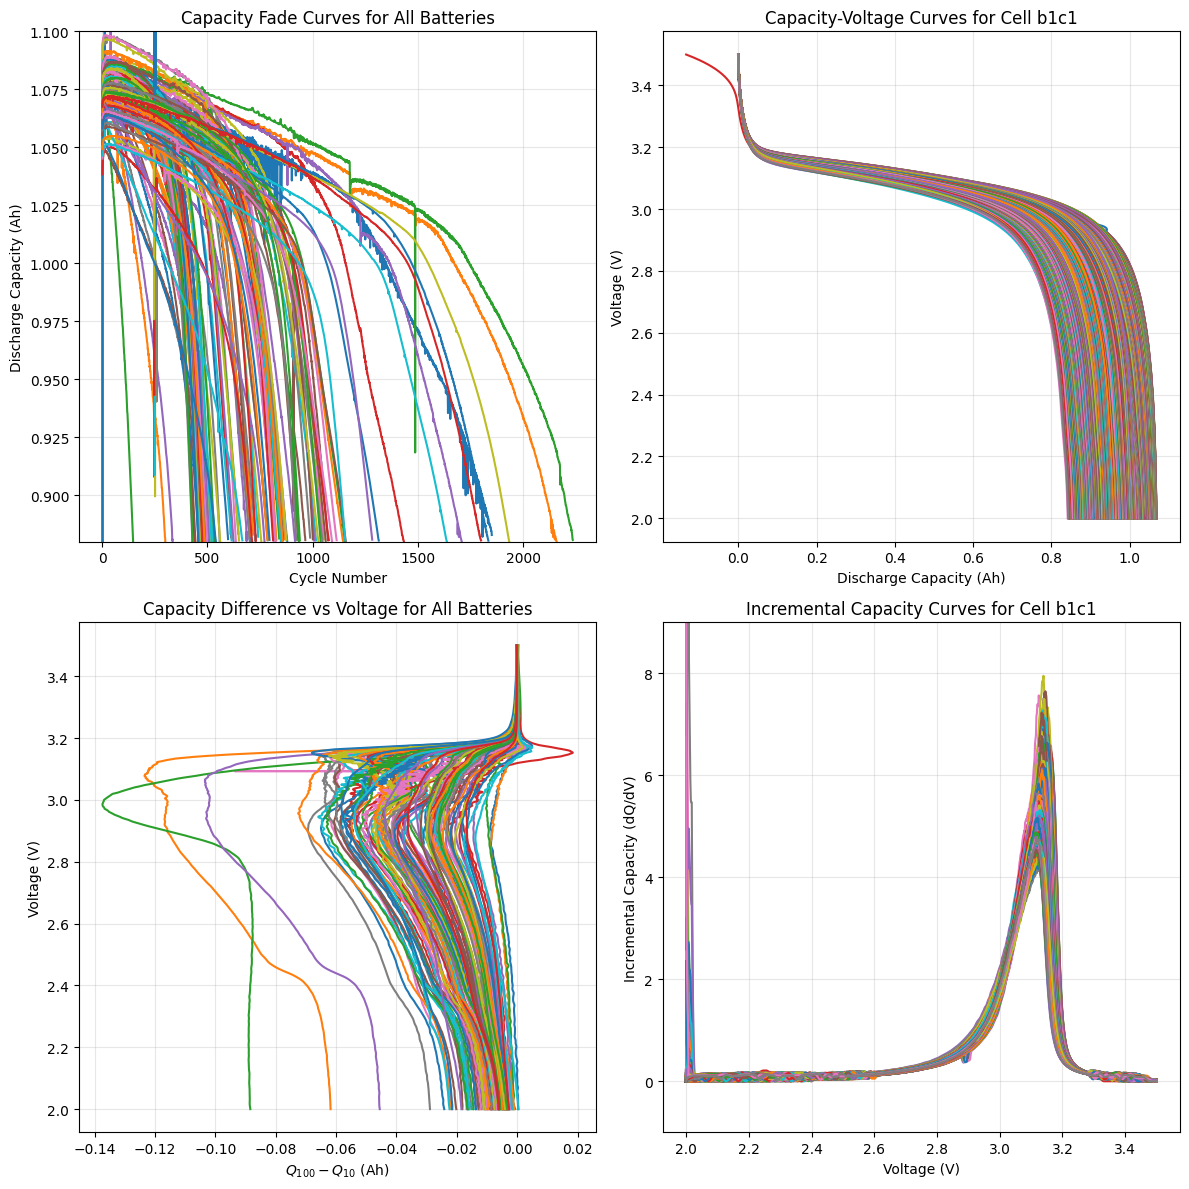

In [13]:
plt.figure(figsize=(12, 12))

# Fig 1: 所有电池的容量衰减曲线
plt.subplot(2, 2, 1)
for cell in all_data.values():
    cycles = cell['summary']['cycle']
    Qd = cell['summary']['QD']
    plt.plot(cycles, Qd)
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.ylim(0.88, 1.1)
plt.title('Capacity Fade Curves for All Batteries')
plt.grid(True, alpha=0.3)

# Fig 2: 某单个电池的各循环容量-电压曲线
plt.subplot(2, 2, 2)
sample_key = "b1c1"  # Use first cell as sample
cell = all_data[sample_key]
for cycle in cell['cycles'].keys():
    if cycle != '0':
        data = cell['cycles'][cycle]
        Qdlin = data["Qdlin"]
        V = cell['Vdlin']
        plt.plot(Qdlin, V)
plt.xlabel('Discharge Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title(f'Capacity-Voltage Curves for Cell {sample_key}')
plt.grid(True, alpha=0.3)

# Fig 3: 所有电池的容量差—电压曲线
plt.subplot(2, 2, 3)
for cell in all_data.values():
    if '100' in cell['cycles'] and '10' in cell['cycles']:
        Qd_100 = cell['cycles']['100']['Qdlin']
        Qd_10 = cell['cycles']['10']['Qdlin']
        delta_Q = Qd_100 - Qd_10
        
        Vdlin = cell['Vdlin']
        plt.plot(delta_Q, Vdlin)
plt.xlabel('$Q_{100} - Q_{10}$ (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Capacity Difference vs Voltage for All Batteries')
plt.grid(True, alpha=0.3)

# Fig 4: 某单个电池的各循环电压-容量增量（IC）曲线
plt.subplot(2, 2, 4)
cell = all_data[sample_key]
for cycle in cell['cycles'].keys():
    if cycle != '0':
        data = cell['cycles'][cycle]
        if 'dQdV' in data:
            dQdV = -data["dQdV"]
            V = cell['Vdlin']
            plt.plot(V, dQdV)
plt.xlabel('Voltage (V)')
plt.ylabel('Incremental Capacity (dQ/dV)')
plt.title(f'Incremental Capacity Curves for Cell {sample_key}')
plt.ylim(-1, 9)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 训练集电池容量衰减可视化 / Training Set Capacity Fade Visualization

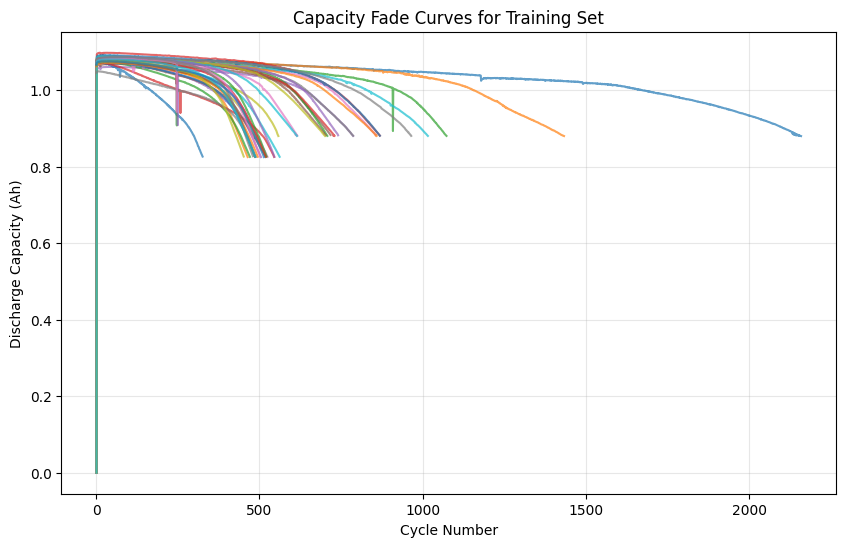

In [4]:
# 绘制训练集电池的容量衰减曲线
plt.figure(figsize=(10, 6))
for key in train_data.keys():
    cell = train_data[key]
    cycles = cell['summary']['cycle']
    Qd = cell['summary']['QD']
    plt.plot(cycles, Qd, alpha=0.7)
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.title('Capacity Fade Curves for Training Set')
plt.grid(True, alpha=0.3)
plt.show()

## 测试集容量差—电压曲线 / Test Set Capacity Difference vs Voltage

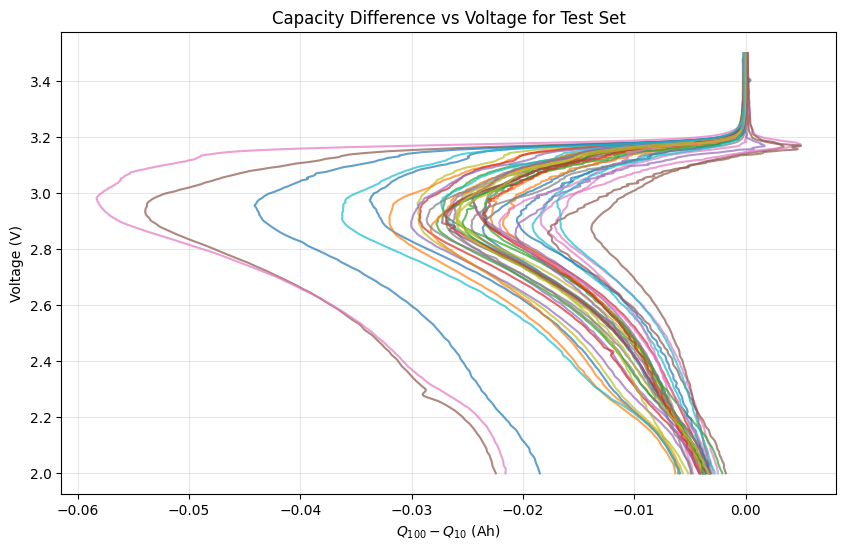

In [5]:
# 绘制测试集电池的容量差—电压曲线
plt.figure(figsize=(10, 6))
for key in test_data.keys():
    cell = test_data[key]
    if '100' in cell['cycles'] and '10' in cell['cycles']:
        Qd_100 = cell['cycles']['100']['Qdlin']
        Qd_10 = cell['cycles']['10']['Qdlin']
        delta_Q = Qd_100 - Qd_10
        Vdlin = cell['Vdlin']
        plt.plot(delta_Q, Vdlin, alpha=0.7)
plt.xlabel('$Q_{100} - Q_{10}$ (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Capacity Difference vs Voltage for Test Set')
plt.grid(True, alpha=0.3)
plt.show()

## 方差与循环寿命的关系 / Variance vs Cycle Life Relationship

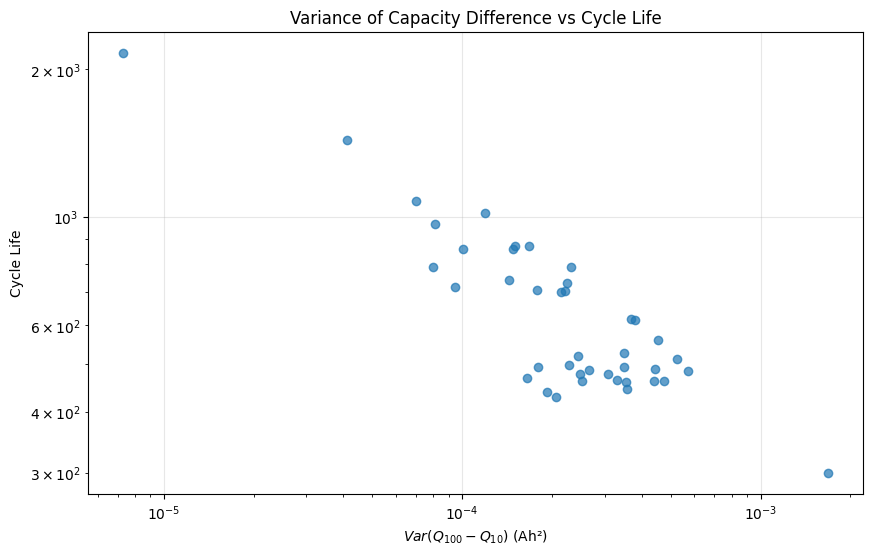

Correlation coefficient: -0.8679


In [12]:
# 绘制$Var(Q_{100} - Q_{10}) (Ah^2)$与循环寿命的散点图
cycleLife = []
DeltaQ_var = []

for key in train_data.keys():
    cell = train_data[key]

    Qd_100 = cell['cycles']['100']['Qdlin']
    Qd_10 = cell['cycles']['10']['Qdlin']
    delta_Q = Qd_100 - Qd_10
    delta_Q_var = np.var(delta_Q)
    DeltaQ_var.append(delta_Q_var)

    cycle_life = cell['cycle_life'].reshape(-1)[0]  # 原来是(1,1) 的二维数组
    cycleLife.append(cycle_life)

plt.figure(figsize=(10, 6))
plt.loglog(DeltaQ_var, cycleLife, 'o', alpha=0.7)
plt.xlabel('$Var(Q_{100} - Q_{10})$ (Ah²)')
plt.ylabel('Cycle Life')
plt.title('Variance of Capacity Difference vs Cycle Life')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correlation coefficient: {np.corrcoef(np.log(DeltaQ_var), np.log(cycleLife))[0,1]:.4f}")

## 数据集统计信息 / Dataset Statistics


Training Dataset Statistics:
  Cells: 41
  Mean cycle life: 673.8
  Std cycle life: 323.1
  Min cycle life: 300.0
  Max cycle life: 2160.0

Validation Dataset Statistics:
  Cells: 43
  Mean cycle life: 709.3
  Std cycle life: 391.2
  Min cycle life: 148.0
  Max cycle life: 2237.0

Test Dataset Statistics:
  Cells: 40
  Mean cycle life: 1032.0
  Std cycle life: 304.7
  Min cycle life: 541.0
  Max cycle life: 1935.0


/tmp/ipykernel_3898793/2042422967.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([train_cycles, val_cycles, test_cycles],


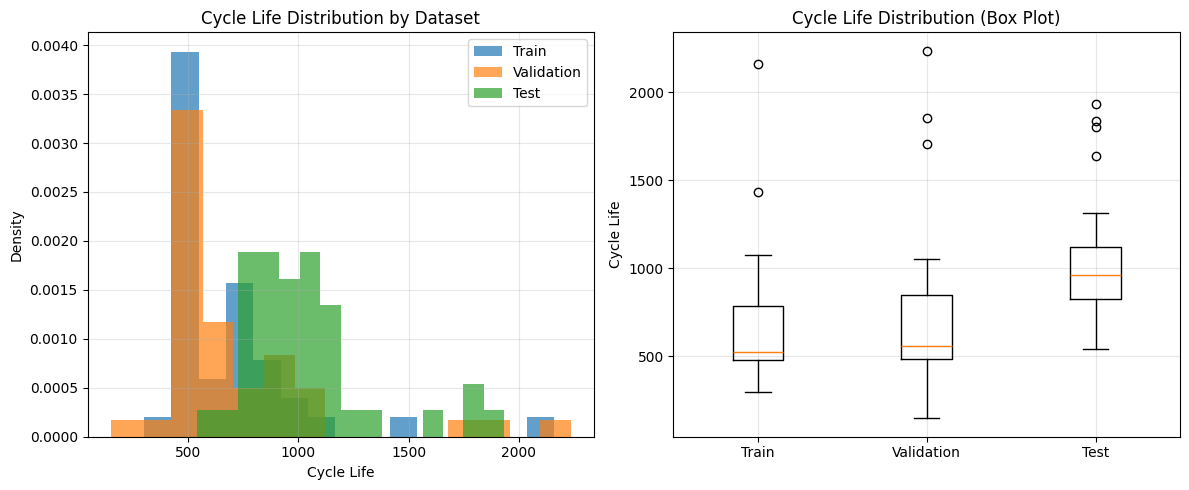

In [7]:
# 统计各数据集的循环寿命分布
def get_cycle_life_stats(data_dict, name):
    cycle_lives = []
    for cell in data_dict.values():
        cycle_lives.append(cell['cycle_life'].reshape(-1)[0])
    
    cycle_lives = np.array(cycle_lives)
    
    print(f"\n{name} Dataset Statistics:")
    print(f"  Cells: {len(cycle_lives)}")
    print(f"  Mean cycle life: {np.mean(cycle_lives):.1f}")
    print(f"  Std cycle life: {np.std(cycle_lives):.1f}")
    print(f"  Min cycle life: {np.min(cycle_lives):.1f}")
    print(f"  Max cycle life: {np.max(cycle_lives):.1f}")
    
    return cycle_lives

train_cycles = get_cycle_life_stats(train_data, "Training")
val_cycles = get_cycle_life_stats(val_data, "Validation")
test_cycles = get_cycle_life_stats(test_data, "Test")

# 可视化循环寿命分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_cycles, bins=15, alpha=0.7, label='Train', density=True)
plt.hist(val_cycles, bins=15, alpha=0.7, label='Validation', density=True)
plt.hist(test_cycles, bins=15, alpha=0.7, label='Test', density=True)
plt.xlabel('Cycle Life')
plt.ylabel('Density')
plt.title('Cycle Life Distribution by Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
all_cycles = np.concatenate([train_cycles, val_cycles, test_cycles])
plt.boxplot([train_cycles, val_cycles, test_cycles], 
           labels=['Train', 'Validation', 'Test'])
plt.ylabel('Cycle Life')
plt.title('Cycle Life Distribution (Box Plot)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()